PRIMER PARCIAL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import math
import mlflow

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

In [2]:
csvToyota= pd.read_csv("ToyotaCorolla_modificado.csv")


In [3]:
columns_to_delete=["Id","Model","Age_08_04","Cylinders","Weight","Radio_cassette","Power_Steering","Gears","Automatic","Radio",
                   "Power_Steering","BOVAG_Guarantee","Mfg_Month"]

df_test=csvToyota.drop(columns=columns_to_delete)
df_test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
Mfg_Year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
KM,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
Fuel_Type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
Met_Color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0
cc,1436.0,NaN,NaN,NaN,1576.85585,424.38677,1300.0,1400.0,1600.0,1600.0,16000.0
Doors,1436.0,NaN,NaN,NaN,4.033426,0.952677,2.0,3.0,4.0,5.0,5.0
Quarterly_Tax,1436.0,NaN,NaN,NaN,87.122563,41.128611,19.0,69.0,85.0,85.0,283.0
Mfr_Guarantee,1436.0,NaN,NaN,NaN,0.409471,0.491907,0.0,0.0,0.0,1.0,1.0


In [4]:
outlierValuePriceDown=5000
outlierValuePriceUp=18500
df_filtered=df_test[(df_test["Price"]>outlierValuePriceDown)&(df_test["Price"]<=outlierValuePriceUp)]

<h1>CREAR EXPERIMENTO</h1>

In [5]:
experiment_name = 'tree'

dict_values = {
    'deep':0,
    'train_score':0,
    'test_score':0,
    'total_score': 0,
    'rmse':0,
    'mse':0
}


def load_create_experiment():
    if mlflow.get_experiment_by_name(experiment_name):
        return mlflow.get_experiment_by_name(experiment_name)
    return mlflow.create_experiment(experiment_name)
    
current_experiment = load_create_experiment()
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='file:///C:/Users/USUARIO/Desktop/ISI/5to%20a%C3%B1o/Inteligencia%20Empresarial%20y%20Datamining/Actividades/Actividad%205%20-%2010-10-2022/mlruns/8', creation_time=1666713899151, experiment_id='8', last_update_time=1666713899151, lifecycle_stage='active', name='tree', tags={}>

In [6]:
#mlflow.start_run()

<ActiveRun: >

<h3 style="color: lightgreen">MODELO: TREE</h3>

In [35]:
Y=df_filtered[["Price"]]
X=df_filtered.drop(columns=["Price"])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13376\615492939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Price"]=np.log(Y["Price"])


(array([ 10.,  38., 124., 226., 299., 297., 153.,  98.,  52.,  54.]),
 array([8.54675199, 8.6746294 , 8.8025068 , 8.9303842 , 9.0582616 ,
        9.186139  , 9.3140164 , 9.44189381, 9.56977121, 9.69764861,
        9.82552601]),
 <BarContainer object of 10 artists>)

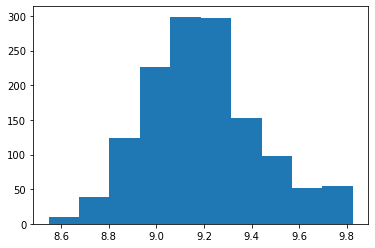

In [36]:
Y["Price"]=np.log(Y["Price"])
plt.hist(Y["Price"],bins=10)

In [37]:
X.shape, Y.shape

((1351, 26), (1351, 1))

In [38]:
datasetsize=X.shape[0]
datasetsize

1351

In [39]:
percentRemoved=0

percentRemoved= (csvToyota.shape[0]-datasetsize)/csvToyota.shape[0] * 100

percentRemoved

5.919220055710307

In [47]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.3,random_state=42,shuffle=True)



dt_param = {
    'criterion': 'squared_error',
    'random_state': 42,
    'max_depth': 4
}

clf_dt = DecisionTreeRegressor(**dt_param)
clf_dt_results = clf_dt.fit(x_train, y_train)

y_pred = clf_dt_results.predict(x_test)

totalScore=clf_dt_results.score(X,Y)
trainScore=clf_dt_results.score(x_train,y_train)
testScore=clf_dt_results.score(x_test,y_test)

print("Total Score: {}".format(totalScore))
print("Train Score: {}".format(trainScore))
print("Test Score: {}".format(testScore))

Total Score: 0.7999045480607181
Train Score: 0.8176956956341005
Test Score: 0.7525758337970481


In [48]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((945, 1), (406, 1), (945, 26), (406, 26))

In [49]:
y_pred = clf_dt_results.predict(x_test) 

In [50]:
print(y_pred.T)

[9.2906157  9.41631572 9.2906157  9.18880208 9.10414239 9.18880208
 8.96059187 9.10414239 8.90671586 9.77712513 9.2906157  9.2906157
 9.10414239 9.18880208 9.18880208 9.68922907 9.11927798 9.41631572
 8.96059187 9.11927798 9.77712513 9.68922907 9.2906157  9.10414239
 8.73197224 8.96059187 9.41631572 9.04140337 9.10414239 9.18880208
 9.18880208 8.7375353  9.10414239 9.10414239 9.41631572 9.68922907
 9.11927798 9.41631572 9.2906157  9.04140337 8.96059187 9.68922907
 9.41631572 9.41631572 8.91355486 9.68922907 9.18880208 9.10414239
 9.2906157  9.10414239 9.41631572 9.2906157  9.41631572 9.18880208
 8.91355486 9.77712513 9.2906157  9.18880208 8.73197224 8.96059187
 9.2906157  9.2906157  9.10414239 9.2906157  9.41631572 9.41631572
 9.10414239 9.18880208 9.10414239 9.77712513 8.91355486 9.2906157
 9.2906157  9.18880208 9.68922907 8.91355486 9.41631572 9.10414239
 9.10414239 9.18880208 9.04140337 9.04140337 9.10414239 9.04140337
 8.90671586 9.10414239 9.10414239 9.2906157  9.10414239 9.041403

In [51]:
mse=mean_squared_error(y_test,y_pred)
mse

0.013143941805846755

In [52]:
rmse=np.sqrt(mse)
rmse

0.11464703138697815

[Text(0.5, 0.9, 'Mfg_Year <= 1999.5\nsamples = 945\nvalue = 9.19'),
 Text(0.25, 0.7, 'Mfg_Year <= 1998.5\nsamples = 580\nvalue = 9.05'),
 Text(0.125, 0.5, 'KM <= 99385.5\nsamples = 284\nvalue = 8.97'),
 Text(0.0625, 0.3, 'Central_Lock <= 0.5\nsamples = 205\nvalue = 9.0'),
 Text(0.03125, 0.1, 'samples = 113\nvalue = 8.96'),
 Text(0.09375, 0.1, 'samples = 92\nvalue = 9.04'),
 Text(0.1875, 0.3, 'KM <= 174490.0\nsamples = 79\nvalue = 8.9'),
 Text(0.15625, 0.1, 'samples = 72\nvalue = 8.91'),
 Text(0.21875, 0.1, 'samples = 7\nvalue = 8.74'),
 Text(0.375, 0.5, 'KM <= 138425.0\nsamples = 296\nvalue = 9.13'),
 Text(0.3125, 0.3, 'Quarterly_Tax <= 78.5\nsamples = 286\nvalue = 9.14'),
 Text(0.28125, 0.1, 'samples = 156\nvalue = 9.1'),
 Text(0.34375, 0.1, 'samples = 130\nvalue = 9.19'),
 Text(0.4375, 0.3, 'Backseat_Divider <= 0.5\nsamples = 10\nvalue = 8.84'),
 Text(0.40625, 0.1, 'samples = 4\nvalue = 8.73'),
 Text(0.46875, 0.1, 'samples = 6\nvalue = 8.91'),
 Text(0.75, 0.7, 'Mfg_Year <= 2001.5\nsa

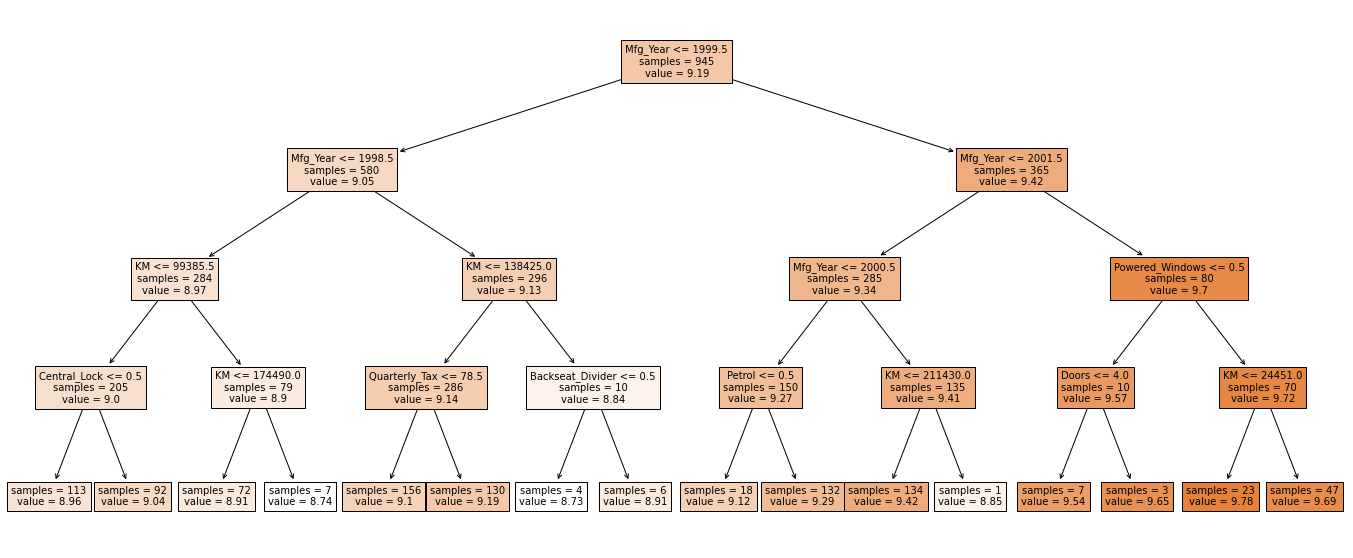

In [54]:
fig, ax = plt.subplots(figsize=(24, 10))
plot = plot_tree(
            decision_tree = clf_dt,
            feature_names = X.columns,
            class_names   = 'Prices',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

plot

<h1 style="color: violet">VALIDACION CON X-VALIDATION</h1>

In [56]:
Y=df_filtered[["Price"]]
X=df_filtered.drop(columns=["Price"])

In [57]:
Y["Price"]=np.log(Y["Price"])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_13376\3880681737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y["Price"]=np.log(Y["Price"])


In [58]:
from sklearn.metrics import get_scorer_names

get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [60]:
kfold_param = {
    'n_splits':10,
    'shuffle':True,
    'random_state':42
}

kfold = KFold(**kfold_param)

clf_dt = DecisionTreeRegressor()

score = cross_val_score(clf_dt, X, Y,cv=kfold, n_jobs=-1,scoring="neg_mean_squared_error")

In [61]:
print(score)

[-0.01586256 -0.01870908 -0.01738562 -0.02433205 -0.01836448 -0.01774456
 -0.02012181 -0.01773774 -0.02093578 -0.0204829 ]


In [62]:
np.mean(abs(score))

0.0191676565867357

In [63]:
math.sqrt(np.mean(abs(score)))

0.13844730617363307

<h1>BUSQUEDA DE HIPERPARAMETROS</h1>

In [ ]:
#clf_dt_3 = DecisionTreeRegressor()
#grid_param = {
#    'criterion':['squared_error','absolute_error','friedman_mse'],
#    'splitter':['best','random'],
#    'max_depth': [2,3,4]
#}

#grid = GridSearchCV(clf_dt_3, param_grid=grid_param, cv=kfold, scoring='accuracy')
#grid_results = grid.fit(x_train, y_train)

<h1>GUARDAR EXPERIMENTO</h1>

In [95]:
from math import sqrt

dict_values = {
    'deep':0,
    'train_score':0,
    'test_score':0,
    'total_score': 0,
    'rmse':0,
    'mse':0
}

mlflow.set_tag('DatasetSize', datasetsize)
mlflow.set_tag('PercentageDataRemoved',percentRemoved)
mlflow.set_tag('Summary',summary)


mlflow.log_metrics(dict_values)

FINALIZAR EXPERIMENTO

In [64]:
#mlflow.end_run()